# Import Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./all_data.csv')

df.columns

Index(['acc_mean_x_right', 'acc_mean_y_right', 'acc_mean_z_right',
       'acc_mean_xyz_right', 'acc_mean_xy_right', 'acc_mean_yz_right',
       'acc_mean_zx_right', 'acc_mean_pitch_right', 'acc_mean_roll_right',
       'acc_std_x_right',
       ...
       'gyro_max_yz_left', 'gyro_max_zx_left', 'gyro_peak_x_left',
       'gyro_peak_y_left', 'gyro_peak_z_left', 'gyro_peak_xyz_left',
       'gyro_peak_xy_left', 'gyro_peak_yz_left', 'gyro_peak_zx_left', 'class'],
      dtype='object', length=157)

# 2 - Classification report

## 2.1 - SGD Model

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgd = SGDClassifier()

sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.51      0.63       337
           1       0.40      0.09      0.15        66
           2       0.90      0.98      0.94      1923

    accuracy                           0.89      2326
   macro avg       0.70      0.53      0.57      2326
weighted avg       0.87      0.89      0.87      2326



## 2.2 - RandomForest Model

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77       337
           1       0.68      0.26      0.37        66
           2       0.93      0.98      0.95      1923

    accuracy                           0.92      2326
   macro avg       0.83      0.64      0.70      2326
weighted avg       0.91      0.92      0.91      2326



## 2.3 - SVC Model

In [6]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.51      0.64       337
           1       0.00      0.00      0.00        66
           2       0.89      0.99      0.94      1923

    accuracy                           0.89      2326
   macro avg       0.58      0.50      0.53      2326
weighted avg       0.86      0.89      0.87      2326



c:\Users\quang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\quang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\quang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## 2.4 - MLP Model

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.53      0.65       337
           1       0.44      0.26      0.32        66
           2       0.90      0.98      0.94      1923

    accuracy                           0.89      2326
   macro avg       0.72      0.59      0.64      2326
weighted avg       0.88      0.89      0.88      2326



## 2.5 - Summary

### 1) Which model has the best weighted average F1 score?
    - 0.86 : SGD
    - 0.91 : Random Forest
    - 0.87 : SVM
    - 0.87 : MLP

=> Random Forest has the best weighted average F1 score

### 2) Which model has the best weighted average precision value?
    - 0.85 : SGD
    - 0.91 : Random Forest
    - 0.86 : SVM
    - 0.88 : MLP

-> Random Forest still has the best weighted average precision value

### 3) Which model has the best weighted average recall value?
    - 0.87 : SGD
    - 0.92 : Random Forest
    - 0.89 : SVM
    - 0.89 : MLP

-> Random Forest

### 4) Which model has the best accuracy value?
    - 0.87 : SGD
    - 0.92 : Random Forest
    - 0.89 : SVM
    - 0.89 : MLP

### 5) Which class has poor performance across all models?

Class 1 has the poorest performace accorss 4 models since its metrics are much lower than that of the other two classes in every models

# 3 - Confusion matrix

## 3.1 - SGD

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

cm_sgd = (confusion_matrix(y_test, y_pred))

cm_sgd

array([[ 229,    2,  106],
       [  49,    1,   16],
       [ 597,    1, 1325]], dtype=int64)

## 3.2 - Random Forest

In [9]:
from sklearn.metrics import confusion_matrix

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm_rf = (confusion_matrix(y_test, y_pred))

cm_rf

array([[ 229,    3,  105],
       [   3,   19,   44],
       [  25,    5, 1893]], dtype=int64)

## 3.3 - SVC

In [10]:
from sklearn.metrics import confusion_matrix

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

cm_svm = (confusion_matrix(y_test, y_pred))

cm_svm

array([[ 173,    0,  164],
       [   3,    0,   63],
       [  28,    0, 1895]], dtype=int64)

## 3.4 - MLP

In [11]:
from sklearn.metrics import confusion_matrix

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

cm_mlp = (confusion_matrix(y_test, y_pred))

cm_mlp

array([[ 226,   11,  100],
       [  13,   21,   32],
       [ 120,  120, 1683]], dtype=int64)

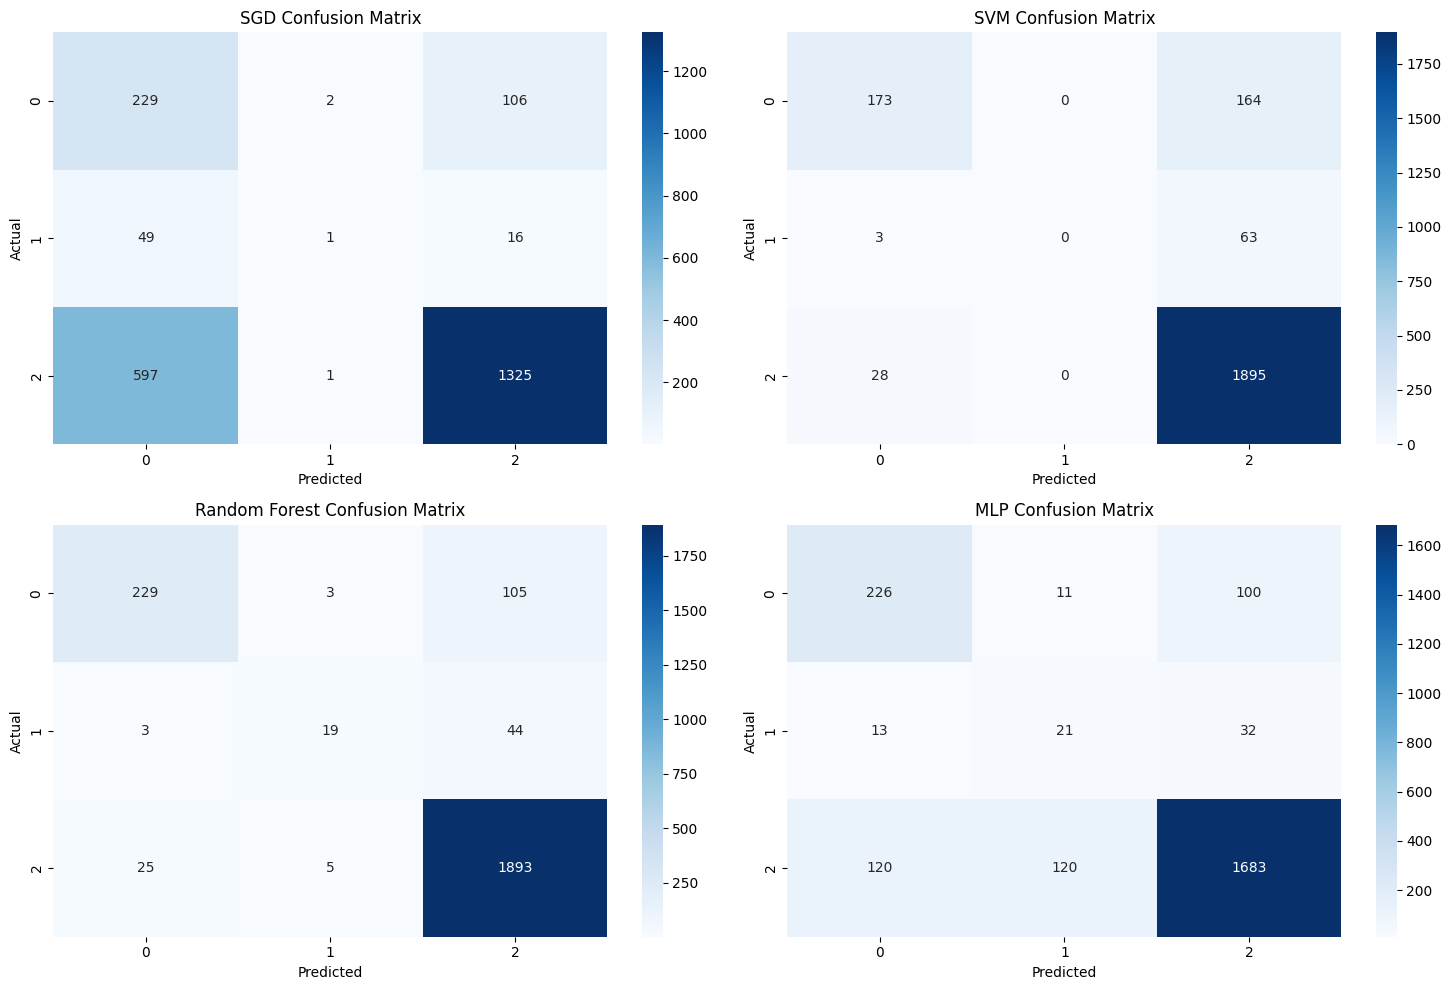

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('SGD Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('SVM Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Random Forest Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('MLP Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Where are the most false positives coming from? How to fix it?

# 4 - Class balancing

In [24]:
# Check distribution of classes
df['class'].value_counts()


class
2    9693
0    1593
1     343
Name: count, dtype: int64

In [34]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Assuming X_train and y_train are your features and target variables
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check class distribution after SMOTE + undersampling
print(Counter(y_resampled))

Counter({1: 7801, 0: 7786, 2: 7785})


In [35]:
y_resampled.value_counts()

class
1    7801
0    7786
2    7785
Name: count, dtype: int64

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Train a random forest classifier on the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1572
           1       0.97      1.00      0.98      1574
           2       0.95      0.95      0.95      1529

    accuracy                           0.96      4675
   macro avg       0.96      0.96      0.96      4675
weighted avg       0.96      0.96      0.96      4675



In [41]:
#visualize the confusion matrix
cm_rf = (confusion_matrix(y_test, y_pred))

cm_rf

array([[1483,   11,   78],
       [   1, 1568,    5],
       [  51,   33, 1445]], dtype=int64)

## Adding class weights

In [44]:
class_weights = {
    0 : 0.3,
    1 : 0.5, 
    2 : 0.2
}

# train the model again with class weights

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(class_weight=class_weights)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77       337
           1       0.72      0.27      0.40        66
           2       0.93      0.99      0.95      1923

    accuracy                           0.92      2326
   macro avg       0.85      0.65      0.71      2326
weighted avg       0.92      0.92      0.91      2326



In [43]:
confusion_matrix(y_test, y_pred)

array([[1481,   15,   76],
       [   1, 1569,    4],
       [  45,   28, 1456]], dtype=int64)